### Algoritmo para determinar quando um ecommerce completou 5 vendas

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from sshtunnel import SSHTunnelForwarder
import pymysql
from sqlalchemy import create_engine
import paramiko

### 1. Funções

In [3]:
# função para realizar queries e as transformar em dataframes
# conexão feita via chave ssh

def query_ssh(query):
    mypkey = paramiko.RSAKey.from_private_key_file(path)
    sql_hostname = '***********'
    sql_username = 'root'
    sql_password = '***********'
    sql_main_database = 'sistema'
    sql_port = 3306
    ssh_host = '*********'
    ssh_user = '**********'
    ssh_port = 22
    ssh_psw = '****'

    with SSHTunnelForwarder(
            (ssh_host, ssh_port),
            ssh_username=ssh_user,
            ssh_password=ssh_psw,
            ssh_pkey=mypkey,
            remote_bind_address=(sql_hostname, sql_port)) as tunnel:
            conn = pymysql.connect(host='*******', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
            base = pd.read_sql_query(query, conn) # utiliza a conexão e a query fornecida a função para criar o dataframe
            conn.close()
            return base
        
# algoritmo para saber quando os parceiros completaram 5 pedidos aprovados

def coleta_5_vendas(df, lista, lista_verificar):
    y=0 # inicia o contador em 0
    for row in df.itertuples(): # usamos itertuples para iterar o dataframe
        y += row[4] # soma a quantidade na linha
        if y >= 5: # se essa soma for maior ou igual a 5
            user_id, company_id,company_name,date,qtd = row[5],row[3], row[2], row[1], y 
            lista.append([id_usuario, id_empresa,nome_empresa,data,qtd]) # appenda informações na lista
            break # break no loop, pois ja sabemos a data em que pelo menos 5 vendas foram completadas
    else:
        id_usuario, id_empresa,nome_empresa,date,qtd = row[5],row[3], row[2], row[1], y
        lista_verificar.append([id_usuario, id_empresa,nome_empresa,data,qtd])

### 2. Rodando o algoritmo

In [ ]:
# listas para alimentar com as informações
lista = []
lista_verificar = []

# query para passar para a função query_ssh()
query = '''
SELECT date, name, company_id, sum(approved_orders), user_id
FROM table
GROUP BY date, company_id
'''

# dataset
dataset = query_ssh(query)

# array com todos os nomes únicos de empresas
empresas_unicas = dataset['name'].unique()

# loop para rodar o algoritmo para cada empresa
for emp in empresas_unicas:
    coleta_5_vendas(dataset.loc[dataset['name'] == str(emp)], lista, lista_verificar)

### 3. Resultado

#### Temos a data e a quantidade do dia em que cada empresa completou 5 ou mais vendas

In [ ]:
df_final = pd.DataFrame(lista)
df_final.rename(columns={0: 'Id_Usuario', 1:'ID Empresa', 2:'Empresa', 3:'data', 4:'QTD acumulada no dia'}, 
                inplace=True)
final

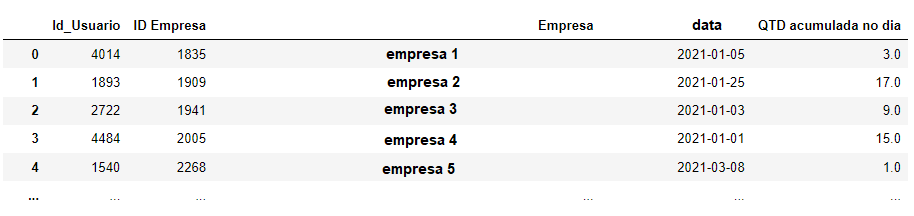